In [1]:
import cv2 as cv
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

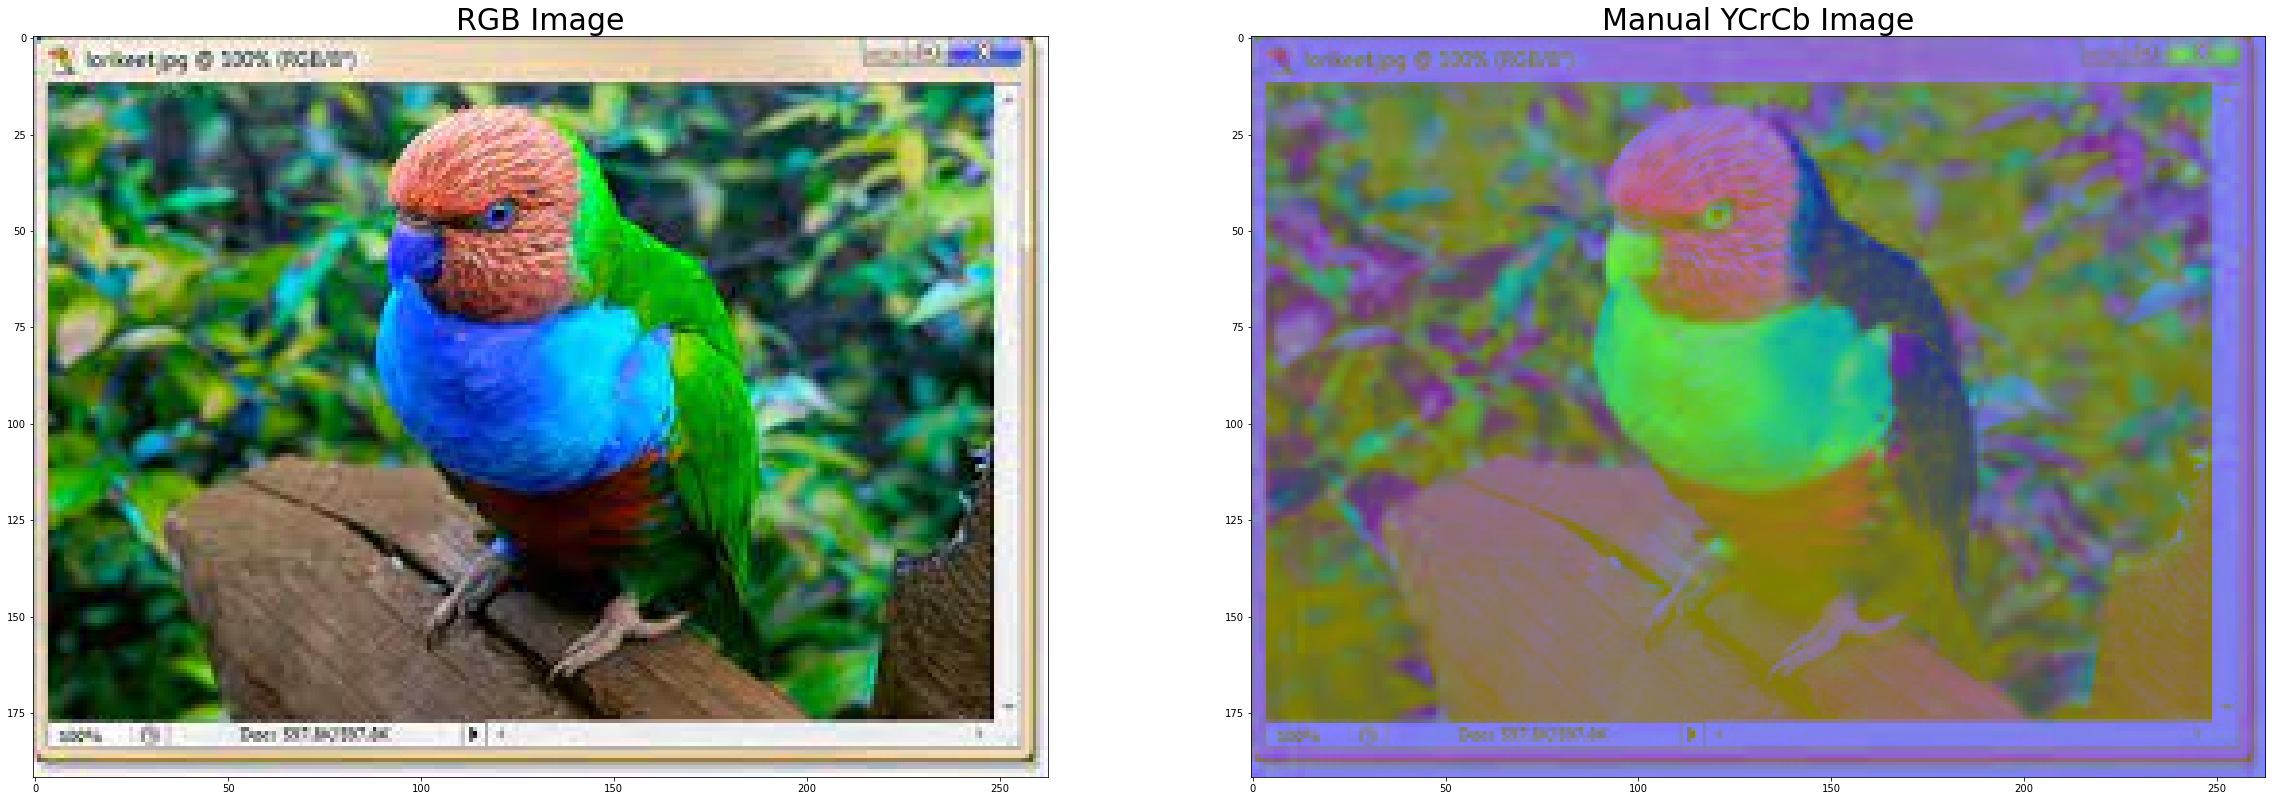

In [3]:
# Load Image
img_rgb = cv.imread("bird.jpg")

# splitting the color channels of the image  and then normalizing
r, g, b = img_rgb[:,:,2], img_rgb[:,:,1], img_rgb[:,:,0]
R, G, B = r/ 255.0 , g/255.0, b/255.0

# create a dummy matrix with all values 0
ycrcb = img_rgb.copy()
ycrcb[:,:,:] = [0, 0 ,0]

# iterating through the image height and width
for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
        
        R = img_rgb[i,j,0]
        G = img_rgb[i,j,1]
        B = img_rgb[i,j,2]
        
        ycrcb[i,j,0] =  0.299 * R + 0.587 * G + 0.114 * B;
        ycrcb[i,j,1] = -0.168736 * R - 0.331264 * G + 0.5 * B + 128;
        ycrcb[i,j,2] =  0.5 * R - 0.418688 * G - 0.081312 * B + 128;

#         # Merge the final output to dummy matrix
#         ycrcb[i,j,0] = (65.738* img_rgb[i,j,2])/256 + (129.057 * img_rgb[i,j,1])/256 + (25.064 * img_rgb[i,j,0])/256
#         ycrcb[i,j,1] = 128 - (37.945 * img_rgb[i,j,2])/256 - (74.494 * img_rgb[i,j,1])/256 + (112.439 * img_rgb[i,j,0])/256
#         ycrcb[i,j,2] = 128 + (112.439 * img_rgb[i,j,2])/256 - (94.154 * img_rgb[i,j,1])/256 - (18.285 * img_rgb[i,j,0])/256
        
# plotting the results on grid
fig, axs = plt.subplots(2, 2, figsize = (40, 40))

plt.subplot(1, 2, 1)
plt.title("RGB Image", fontsize = 30)
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.title("Manual YCrCb Image", fontsize = 30)
plt.imshow(cv.cvtColor(ycrcb, cv.COLOR_BGR2RGB))

cv.imshow("Original Image", img_rgb)
key=cv.waitKey(0)

cv.imshow('YCbCr IMAGE',ycrcb)
cv.waitKey(0)
cv.destroyAllWindows()
